# Etude et analyse comparative des méthodes de clustering 

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from scipy.io import arff
from sklearn import cluster
from sklearn import metrics 
from sklearn.neighbors import NearestNeighbors

path = './dataset/'

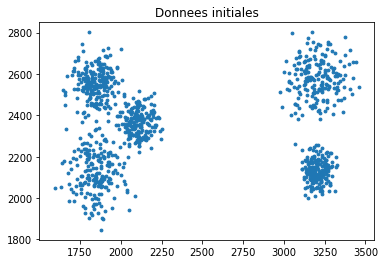


///////////////// k =  2 /////////////////
indice de silhouette : 0.7693175579738792
indice de DB : 0.36532838701362746

///////////////// k =  3 /////////////////
indice de silhouette : 0.739306200903622
indice de DB : 0.369454086087525

///////////////// k =  4 /////////////////
indice de silhouette : 0.5704914980346246
indice de DB : 0.6041216871818991

///////////////// k =  5 /////////////////
indice de silhouette : 0.6372394694281514
indice de DB : 0.4868405399539363

///////////////// k =  6 /////////////////
indice de silhouette : 0.5952140468726539
indice de DB : 0.6709461042247647

///////////////// k =  7 /////////////////
indice de silhouette : 0.5369486618762327
indice de DB : 0.8455341745783983

///////////////// k =  8 /////////////////
indice de silhouette : 0.5350106382862715
indice de DB : 0.7883906087506162

///////////////// k =  9 /////////////////
indice de silhouette : 0.47105328470057367
indice de DB : 0.9099497589847023

///////////////// k =  10 /////////////

In [107]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import pairwise_distances

filename = "zz2.txt"
databrut = pd.read_csv(path+filename, sep =" ", skipinitialspace=True)
data = databrut
datanp = databrut.to_numpy()
f0 = [f[0] for f in datanp]
f1 = [f[1] for f in datanp]

plt.scatter(f0, f1, s=8) #s= : taille des points sur le graphique
plt.title("Donnees initiales")
plt.show()

#############################
###        K-Means        ###
#############################

## Ici on détermine k le nombre de clusters optimal
for k in range (2,40):
#k=15
    tps1 = time.time()
    model = cluster.KMeans(n_clusters=k, init='k-means++')
    model.fit(datanp)
    tps2 = time.time()
    labels = model.labels_
    iteration = model.n_iter_
    print("\n///////////////// k = ",k,"/////////////////")
    sil=metrics.silhouette_score(datanp, labels, metric='euclidean')
    print("indice de silhouette :", sil)
    print("indice de DB :", davies_bouldin_score(datanp, labels))
    



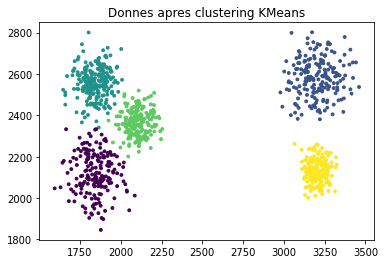

nb clusters = 8 , nb iter = 4 , runtime =  46.49 ms


In [108]:
#On choisit notre k grâce aux résultats précédents
tps1 = time.time()
model = cluster.KMeans(n_clusters=5, init='k-means++')
model.fit(datanp)
tps2 = time.time()
labels = model.labels_
iteration = model.n_iter_

plt.scatter(f0, f1, c=labels, s=8)
plt.title("Donnes apres clustering KMeans")
plt.show()
print("nb clusters =",8,", nb iter =",iteration, ", runtime = ", round((tps2 - tps1)*1000,2),"ms")



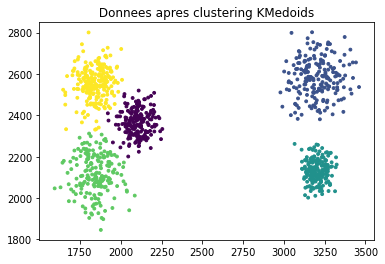

 nb clusters =  5  , nb iter =  2  , runtime =  16.07  ms 


In [111]:
#############################
###       K-Medoids       ###
#############################

from sklearn import metrics
import kmedoids
from sklearn . metrics . pairwise import euclidean_distances
from sklearn . metrics . pairwise import manhattan_distances

# nombre de clusters : 
#for k in range(2,15):
k = 5
tps1 = time . time ()
distmatrix = manhattan_distances ( datanp )
fp = kmedoids . fasterpam ( distmatrix , k )
tps2 = time . time ()
iter_kmed = fp . n_iter
labels_kmed = fp . labels
    #print("\n///////////////// k = ",k,"/////////////////")
    ##print ( " Loss with FasterPAM : " , fp . loss )
    #sil=metrics.silhouette_score(datanp, labels_kmed, metric='euclidean')
    #print("indice de silhouette :", sil)
    #print("indice de DB :", davies_bouldin_score(distmatrix, labels_kmed))

plt . scatter ( f0 , f1 , c = labels_kmed , s = 8 )
plt . title ( " Donnees apres clustering KMedoids " )
plt . show ()
print ( " nb clusters = " ,k , " , nb iter = " , iter_kmed , " , runtime = " , round (( tps2 - tps1 ) * 1000 , 2 ) ," ms " )




In [ ]:
##############################
###      Agglomératif      ###
##############################
import scipy . cluster . hierarchy as shc

# Donnees dans datanp
print (" Dendrogramme 'single' donnees initiales ")
linked_mat = shc . linkage ( datanp , 'single')
plt . figure ( figsize =( 12 , 12 ) )
shc . dendrogram ( linked_mat ,
orientation ='top',
distance_sort ='descending',
show_leaf_counts = False )
plt . show ()


In [121]:
# set di stance_threshold ( 0 ensures we compute the full tree )
#linkages : single, average, complete, wardlinkage
for k in range(2,15):
    tps1 = time . time ()
    model = cluster.AgglomerativeClustering(linkage = "single" , n_clusters = k )
    model = model.fit (datanp)
    tps2 = time.time ()
    labels = model.labels_
    k = model.n_clusters_
    leaves = model.n_leaves_

    #affichage des indices
    print("\n///////////////// k = ",k,"/////////////////")
    sil=metrics.silhouette_score(datanp, labels, metric='euclidean')
    print("indice de silhouette :", sil)
    print("indice de DB :", davies_bouldin_score(datanp, labels))



///////////////// k =  2 /////////////////
indice de silhouette : 0.7693175579738792
indice de DB : 0.36532838701362746

///////////////// k =  3 /////////////////
indice de silhouette : 0.739306200903622
indice de DB : 0.369454086087525

///////////////// k =  4 /////////////////
indice de silhouette : 0.6748678417566585
indice de DB : 0.39533351883917106

///////////////// k =  5 /////////////////
indice de silhouette : 0.2636962816968701
indice de DB : 0.6066098064856049

///////////////// k =  6 /////////////////
indice de silhouette : 0.21528530633885284
indice de DB : 0.5925675040118797

///////////////// k =  7 /////////////////
indice de silhouette : 0.1350610849901432
indice de DB : 0.5950344587721901

///////////////// k =  8 /////////////////
indice de silhouette : 0.11050309828394347
indice de DB : 0.5790961394544666

///////////////// k =  9 /////////////////
indice de silhouette : 0.10513713878192937
indice de DB : 0.5685636622801074

///////////////// k =  10 //////////

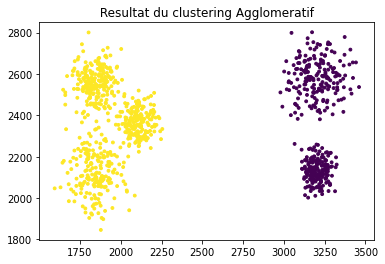

 nb clusters =  2  , nb feuilles =  999  runtime =  7.53  ms 


In [122]:
# set the number of clusters
k = 2
tps1 = time . time ()
model = cluster.AgglomerativeClustering( linkage = "single" , n_clusters = k )
model = model.fit (datanp)
tps2 = time.time ()
labels = model.labels_
kres = model.n_clusters_
leaves = model.n_leaves_

# Affichage clustering
plt . scatter ( f0 , f1 , c = labels , s = 8 )
plt . title ( " Resultat du clustering Agglomeratif " )
plt . show ()
print ( " nb clusters = " ,k , " , nb feuilles = " , leaves ,
       " runtime = " , round (( tps2 - tps1 ) * 1000 , 2 ) ," ms " )

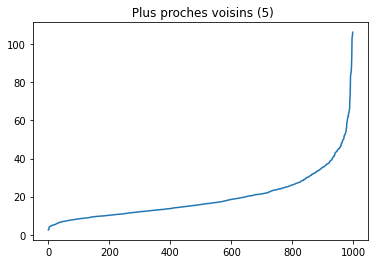

In [126]:
##############################
###         DBSCAN         ###
##############################

from sklearn.preprocessing import StandardScaler

# Distances k plus proches voisins
# Donnees dans X
k=5
neigh = NearestNeighbors ( n_neighbors =k )
neigh.fit (datanp)
distances, indices = neigh.kneighbors(datanp)
# retirer le point " origine "
newDistances = np.asarray ([np.average(distances[i][1:]) for i in range (0,distances.shape[0])])
trie = np.sort(newDistances)

plt.title(" Plus proches voisins (5)")
plt.plot(trie) ;
plt.show()



In [138]:
## Méthode DBSCAN 
from sklearn.cluster import DBSCAN
from sklearn import metrics

for k in range (2,100,2):
#k=22000
    db = DBSCAN(eps=k, min_samples=10).fit(datanp)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    #affichage des indices
    print("\n///////////////// k = ",k,"/////////////////")
    #sil=metrics.silhouette_score(datanp, labels, metric='euclidean')
    #print("indice de silhouette :", sil)
    #print("indice de DB :", davies_bouldin_score(datanp, labels))
    
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    print("Estimated number of clusters: %d" % n_clusters_)
    print("Estimated number of noise points: %d" % n_noise_)

    


///////////////// k =  2 /////////////////
Estimated number of clusters: 0
Estimated number of noise points: 999

///////////////// k =  4 /////////////////
Estimated number of clusters: 0
Estimated number of noise points: 999

///////////////// k =  6 /////////////////
Estimated number of clusters: 0
Estimated number of noise points: 999

///////////////// k =  8 /////////////////
Estimated number of clusters: 0
Estimated number of noise points: 999

///////////////// k =  10 /////////////////
Estimated number of clusters: 0
Estimated number of noise points: 999

///////////////// k =  12 /////////////////
Estimated number of clusters: 1
Estimated number of noise points: 989

///////////////// k =  14 /////////////////
Estimated number of clusters: 2
Estimated number of noise points: 973

///////////////// k =  16 /////////////////
Estimated number of clusters: 9
Estimated number of noise points: 894

///////////////// k =  18 /////////////////
Estimated number of clusters: 9
Estimat

Estimated number of clusters: 5
Estimated number of noise points: 56


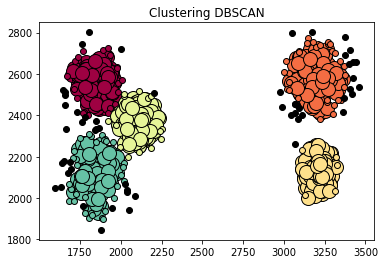

In [139]:
k=56
db = DBSCAN(eps=k, min_samples=10).fit(datanp)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
    
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = np.array(datanp)[(class_member_mask & core_samples_mask)]
    plt.plot(xy[:, 0],xy[:, 1],"o",markerfacecolor=tuple(col),
        markeredgecolor="k",markersize=14,)

    xy = np.array(datanp)[(class_member_mask & ~core_samples_mask)]
    plt.plot(xy[:, 0],xy[:, 1],"o",markerfacecolor=tuple(col),
        markeredgecolor="k",markersize=6,)

plt.title("Clustering DBSCAN")
plt.show()

In [142]:
#############################
###        HDBSCAN        ###
#############################
import hdbscan

#for k in range (1,150):
k=9
db = hdbscan.HDBSCAN(min_samples=k).fit(datanp)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
labels = db.labels_
    #affichage des indices
    #print("\n///////////////// k = ",k,"/////////////////")
    #sil=metrics.silhouette_score(datanp, labels, metric='euclidean')
    #print("indice de silhouette :", sil)
    #print("indice de DB :", davies_bouldin_score(datanp, labels))
    
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 5
Estimated number of noise points: 39


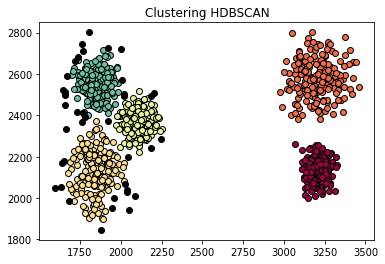

In [143]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = np.array(datanp)[(class_member_mask & core_samples_mask)]
    plt.plot(xy[:, 0],xy[:, 1],"o",markerfacecolor=tuple(col),
        markeredgecolor="k",markersize=14,)

    xy = np.array(datanp)[(class_member_mask & ~core_samples_mask)]
    plt.plot(xy[:, 0],xy[:, 1],"o",markerfacecolor=tuple(col),
        markeredgecolor="k",markersize=6,)

plt.title("Clustering HDBSCAN")
plt.show()